In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city_data_df = pd.read_csv("Resources2/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
ride_data_df = pd.read_csv("Resources2/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [4]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [5]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [7]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df_types = city_data_df["type"].unique()
city_data_df_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Getting the number of data points from the city types by grouping (trying this way as it could be more efficient)
city_data_df_types_count = city_data_df.groupby(["type"]).count()["city"]
city_data_df_types_count

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

In [11]:
# Getting the total number of drivers from the city types by grouping
city_data_df_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_data_df_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# Getting the total number of rides from the city types by grouping
pyber_data_df_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
pyber_data_df_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# Getting the total fares from the city types by grouping
pyber_data_df_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
pyber_data_df_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
# Calculating the Average Fare per Ride
avg_fare_ride = pyber_data_df_fares / pyber_data_df_rides
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [16]:
# Calculating the Average Fare per Driver
avg_fare_driver = pyber_data_df_fares / city_data_df_drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [17]:
# Creating a PyBer Summary DataFrame (Challenge - Part 1)
pyber_summary_df = pd.DataFrame({
    "City type":city_data_df_types,
    "Total Rides":pyber_data_df_rides,
    "Total Drivers":city_data_df_drivers,
    "Total Fares":pyber_data_df_fares,
    "Average Fare per Ride":avg_fare_ride,
    "Average Fare per Driver":avg_fare_driver
    })
pyber_summary_df = pyber_summary_df.set_index(["City type"])
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Rural,1625,2405,39854.38,24.525772,16.571468


In [18]:
#formating the values
pyber_summary_df.style.format(
    {"Total Rides":"{:,}".format,
    "Total Drivers":"{:,}".format,
    "Total Fares":"${:,.2f}".format, 
    "Average Fare per Ride":"${:.2f}".format,
    "Average Fare per Driver":"${:.2f}".format})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,"1,625","2,405","$39,854.38",$24.53,$16.57


In [19]:
# Renaming the columns
pyber_data_df = pyber_data_df.rename(columns=
    {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id',
    'driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [20]:
# Setting the index to the Date column
pyber_data_df_new = pyber_data_df.set_index(["Date"])
pyber_data_df_new.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban


In [21]:
# Creating a new datafarme by copying a few columns from the existing one with the "Date" as a column  
pyber_data_df_copy = pyber_data_df_new[["City Type", "Fare"]].copy()
pyber_data_df_copy['Date'] = pyber_data_df_copy.index
pyber_data_df_copy

,City Type,Fare,Date
Date,,,
1/14/2019 10:14,Urban,13.83,1/14/2019 10:14
3/4/2019 18:24,Urban,30.24,3/4/2019 18:24
2/24/2019 4:29,Urban,33.44,2/24/2019 4:29
2/10/2019 23:22,Urban,23.44,2/10/2019 23:22
3/6/2019 4:28,Urban,34.58,3/6/2019 4:28
...,...,...,...
4/29/2019 17:04,Rural,13.38,4/29/2019 17:04
1/30/2019 0:05,Rural,20.76,1/30/2019 0:05
2/10/2019 21:03,Rural,11.11,2/10/2019 21:03


In [22]:
#Dropping "Date" column
pyber_data_df_final = pyber_data_df_copy.drop(columns=["Date"])
pyber_data_df_final

,City Type,Fare
Date,,
1/14/2019 10:14,Urban,13.83
3/4/2019 18:24,Urban,30.24
2/24/2019 4:29,Urban,33.44
2/10/2019 23:22,Urban,23.44
3/6/2019 4:28,Urban,34.58
...,...,...
4/29/2019 17:04,Rural,13.38
1/30/2019 0:05,Rural,20.76
2/10/2019 21:03,Rural,11.11


In [23]:
pyber_data_df_final.index.dtype

dtype('O')

In [24]:
pyber_data_df_final.index = pd.to_datetime(pyber_data_df_final.index)

In [25]:
pyber_data_df_final.index.dtype

dtype('<M8[ns]')

In [26]:
# Checking if there is no difference between datetime64[ns] and np.dtype <M8[ns]
import numpy as np
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [27]:
# Using the info() method to check the data types
pyber_data_df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [28]:
# Calculating the fare and creating a new data frame (step 7)
calculating_pyber_data_fare = pd.DataFrame(pyber_data_df_final.groupby(["City Type", "Date"]).sum()["Fare"])
calculating_pyber_data_fare

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [29]:
# Resetting the index to the "Date" (step 8)
calculating_pyber_data_fare2 = calculating_pyber_data_fare.reset_index().set_index(["Date"])

calculating_pyber_data_fare2

,City Type,Fare
Date,,
2019-01-01 09:45:00,Rural,43.69
2019-01-02 11:18:00,Rural,52.12
2019-01-03 19:51:00,Rural,19.90
2019-01-04 03:31:00,Rural,24.88
2019-01-06 07:38:00,Rural,47.33
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [30]:
# Creating a pivot table dataframe (step 9)
table = pd.pivot_table(calculating_pyber_data_fare2, values ='Fare', index =['Date'], 
                         columns =['City Type'], aggfunc = np.sum) 
  
table 

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [31]:
#Create a new DataFrame from the pivot table DataFrame on the given dates using loc
selected_dates_df = pd.DataFrame(table.loc['2019-01-01':'2019-04-28'])
selected_dates_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [32]:
# Create a new DataFrame by setting the DataFrame with resample() in weekly bins, 
# and calculate the sum() of the fares for each week
# 1) Rural
weekly_resampled_rural = selected_dates_df.Rural.resample('W').sum()
weekly_resampled_rural

Date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

In [33]:
# 2) Suburban
weekly_resampled_suburban = selected_dates_df.Suburban.resample('W').sum()
weekly_resampled_suburban

Date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
2019-02-10     974.34
2019-02-17    1045.50
2019-02-24    1412.74
2019-03-03     858.46
2019-03-10     925.27
2019-03-17     906.20
2019-03-24    1122.20
2019-03-31    1045.06
2019-04-07    1010.73
2019-04-14     784.82
2019-04-21    1149.27
2019-04-28    1357.75
Freq: W-SUN, Name: Suburban, dtype: float64

In [34]:
# 3) Urban
weekly_resampled_urban = selected_dates_df.Urban.resample('W').sum()
weekly_resampled_urban

Date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
2019-02-10    2162.64
2019-02-17    2235.07
2019-02-24    2466.29
2019-03-03    2218.20
2019-03-10    2470.93
2019-03-17    2044.42
2019-03-24    2368.37
2019-03-31    1942.77
2019-04-07    2356.70
2019-04-14    2390.72
2019-04-21    2303.80
2019-04-28    2238.29
Freq: W-SUN, Name: Urban, dtype: float64

In [35]:
# Creating a data frame with resampled weekly bins
weekly_resampled_df = pd.DataFrame({
    "Rural": weekly_resampled_rural, 
     "Suburban": weekly_resampled_suburban, 
     "Urban": weekly_resampled_urban})
weekly_resampled_df.index.name = None
weekly_resampled_df

,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


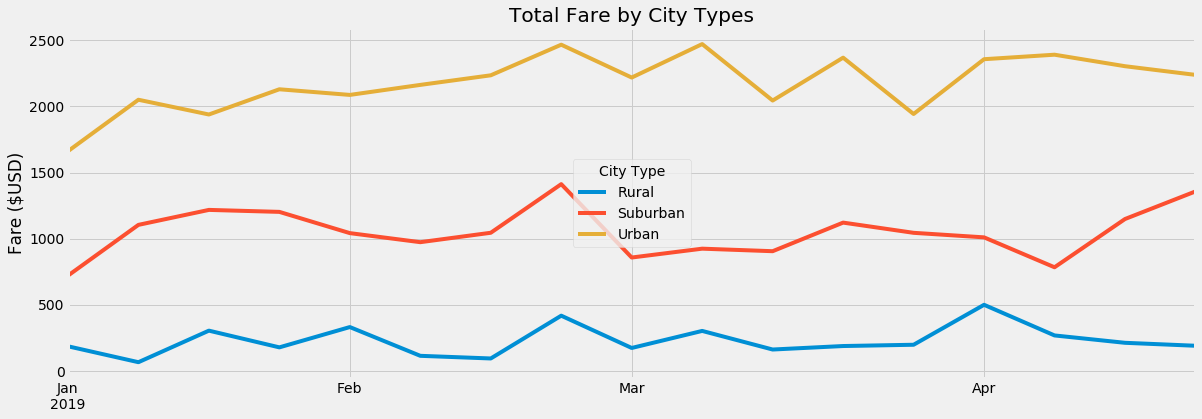

In [36]:
plt.style.use('fivethirtyeight')

weekly_resampled_df.plot(y=['Rural', 'Suburban', 'Urban'], figsize=(18,6), title='Total Fare by City Types')
plt.ylabel("Fare ($USD)")
plt.legend(loc='center', title="City Type")
plt.savefig("analysis/Fig8.png")
plt.show()